In [1]:
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation
import re  # Regular expressions for text processing
import nltk  # NLTK for natural language processing
from nltk.corpus import stopwords  # Stopwords for text preprocessing
from nltk.stem.porter import PorterStemmer  # Porter Stemmer for stemming
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF vectorization
from sklearn.model_selection import train_test_split  # Splitting the dataset
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score  # Accuracy score metric
from nltk.stem.porter import PorterStemmer  # Porter Stemmer for text preprocessing
from sklearn.metrics import confusion_matrix  # Confusion matrix for evaluation
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report  # Classification report for evaluation
#nltk.download('punkt')

In [2]:
 # Spécifiez le chemin du fichier sur Google Drive
file_path = 'train.csv'
# Chargez le fichier CSV dans un DataFrame
dataset = pd.read_csv(file_path)


In [3]:
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
dataset.shape

(20800, 5)

In [5]:
# Step 1: Missing Value Handling (Optional - If needed)
# To remove rows with missing values for specific columns, use the following:

import nltk
nltk.download('punkt')

dataset.dropna(subset=['label'], inplace=True)

# If you want to remove columns with missing values, use the following:
# dataset.dropna(axis=1, inplace=True)

# Step 2: Text Cleaning
def clean_text(text):
    # Check if the input is a string, if not, return an empty string
    if not isinstance(text, str):
        return ''

    # Remove non-alphanumeric characters and extra whitespaces using regular expressions
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

# Apply the 'clean_text' function to the 'text' column and create a new 'cleaned_text' column
dataset['cleaned_text'] = dataset['text'].apply(clean_text)

# Step 3: Tokenization and Lowercasing
def tokenize_and_lowercase(text):
    # Tokenize the text into individual words or tokens
    tokens = nltk.word_tokenize(text)

    # Convert each token to lowercase for uniformity
    tokens = [word.lower() for word in tokens]
    return ' '.join(tokens)

# Apply the 'tokenize_and_lowercase' function to the 'cleaned_text' column
dataset['cleaned_text'] = dataset['cleaned_text'].apply(tokenize_and_lowercase)

# Display the DataFrame with the required columns
print(dataset[['id', 'title', 'author', 'text', 'label', 'cleaned_text']])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\b\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [6]:
dataset.head(3)

,id,title,author,text,label,cleaned_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide we didn t even see comey s lett...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,why the truth might get you fired october the ...


In [7]:
# Step 4: Stopword Removal
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove common stopwords from the tokens
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the 'remove_stopwords' function to the 'cleaned_text' column
dataset['cleaned_text'] = dataset['cleaned_text'].apply(remove_stopwords)

# Step 5: Stemming (You can also use Lemmatization if preferred)
stemmer = PorterStemmer()

def stem_text(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Apply stemming to reduce words to their base or root form
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Apply the 'stem_text' function to the 'cleaned_text' column
dataset['cleaned_text'] = dataset['cleaned_text'].apply(stem_text)
dataset.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\b\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,title,author,text,label,cleaned_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,hous dem aid even see comey letter jason chaff...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,ever get feel life circl roundabout rather hea...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fire octob tension intellig an...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,video civilian kill singl us airstrik identifi...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,print iranian woman sentenc six year prison ir...


In [9]:
# Step 6: TF-IDF Vectorization
vectorizer = TfidfVectorizer()

# Use TF-IDF vectorization to convert text data into numerical form
X = vectorizer.fit_transform(dataset['cleaned_text'])

# Step 7: Splitting the Data
# Split the dataset into training and testing subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, dataset['label'], test_size=0.2, random_state=42)

# Display the first few rows of the preprocessed data
dataset.head(3)

# Now, you have preprocessed data ready for model training and evaluation.

,id,title,author,text,label,cleaned_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,hous dem aid even see comey letter jason chaff...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,ever get feel life circl roundabout rather hea...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fire octob tension intellig an...


In [10]:
dataset.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model 1: Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train, Y_train)
Y_pred_lr = logistic_regression.predict(X_test)

# Model 2: Multinomial Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, Y_train)
Y_pred_nb = naive_bayes.predict(X_test)

# Model 3: Passive Aggressive Classifier
passive_aggressive = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
passive_aggressive.fit(X_train, Y_train)
Y_pred_pa = passive_aggressive.predict(X_test)

# Evaluate the models
def evaluate_model(model_name, Y_true, Y_pred):
    accuracy = accuracy_score(Y_true, Y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'Classification Report for {model_name}:\n', classification_report(Y_true, Y_pred))
    print(f'Confusion Matrix for {model_name}:\n', confusion_matrix(Y_true, Y_pred))

# Evaluate Logistic Regression
evaluate_model('Logistic Regression', Y_test, Y_pred_lr)
print()

# Evaluate Multinomial Naive Bayes
evaluate_model('Multinomial Naive Bayes', Y_test, Y_pred_nb)
print()

# Evaluate Passive Aggressive Classifier
evaluate_model('Passive Aggressive Classifier', Y_test, Y_pred_pa)
print()

Logistic Regression Accuracy: 0.94
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      2132
           1       0.94      0.95      0.94      2028

    accuracy                           0.94      4160
   macro avg       0.94      0.94      0.94      4160
weighted avg       0.94      0.94      0.94      4160

Confusion Matrix for Logistic Regression:
 [[2000  132]
 [ 101 1927]]

Multinomial Naive Bayes Accuracy: 0.88
Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      2132
           1       0.98      0.76      0.86      2028

    accuracy                           0.88      4160
   macro avg       0.89      0.87      0.87      4160
weighted avg       0.89      0.88      0.87      4160

Confusion Matrix for Multinomial Naive Bayes:
 [[2093   39]
 [ 477 1551]]

Passive Aggressive Classif

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
random_forest.fit(X_train, Y_train)

# Make predictions
Y_pred_rf = random_forest.predict(X_test)

# Evaluate the Random Forest model
evaluate_model('Random Forest', Y_test, Y_pred_rf)

Random Forest Accuracy: 0.92
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      2132
           1       0.93      0.90      0.92      2028

    accuracy                           0.92      4160
   macro avg       0.92      0.92      0.92      4160
weighted avg       0.92      0.92      0.92      4160

Confusion Matrix for Random Forest:
 [[2005  127]
 [ 203 1825]]


In [3]:
import xgboost as xgb

# Create an XGBoost classifier
xgboost_classifier = xgb.XGBClassifier(random_state=42)

# Train the XGBoost model
xgboost_classifier.fit(X_train, Y_train)

# Make predictions
Y_pred_xgb = xgboost_classifier.predict(X_test)

# Evaluate the XGBoost model
evaluate_model('XGBoost', Y_test, Y_pred_xgb)

ModuleNotFoundError: No module named 'xgboost'

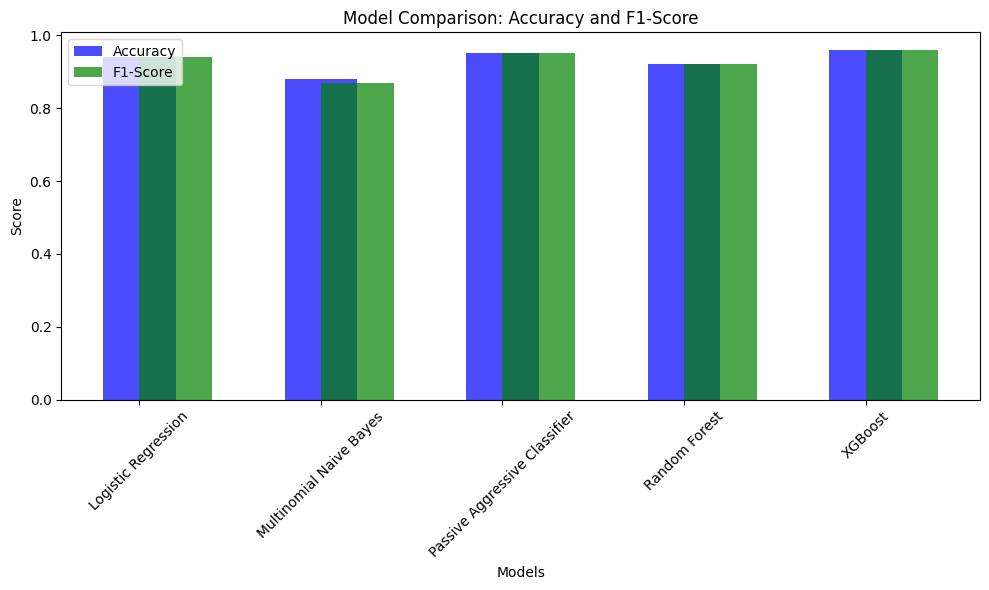

In [38]:
import matplotlib.pyplot as plt

# Define the model names and their corresponding accuracy and F1 scores
model_names = ["Logistic Regression", "Multinomial Naive Bayes", "Passive Aggressive Classifier", "Random Forest", "XGBoost"]
accuracies = [0.94, 0.88, 0.95, 0.92, 0.96]
f1_scores = [0.94, 0.87, 0.95, 0.92, 0.96]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, label="Accuracy", width=0.4, align='center', alpha=0.7, color='b')
plt.bar(model_names, f1_scores, label="F1-Score", width=0.4, align='edge', alpha=0.7, color='g')

# Add labels and legend
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy and F1-Score")
plt.legend(loc="upper left")

# Display the bar chart
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [39]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define your XGBoost classifier
xgboost_classifier = xgb.XGBClassifier(random_state=42)

# Define the number of folds (k) for cross-validation
k = 5  # You can choose any suitable number of folds

# Create a cross-validation object (StratifiedKFold is commonly used)
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation and calculate accuracy scores
scores = cross_val_score(xgboost_classifier, X_train, Y_train, cv=cv, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = scores.mean()
std_score = scores.std()

# Print the results
print(f'Mean Accuracy: {mean_score:.2f}')
print(f'Standard Deviation: {std_score:.2f}')

Mean Accuracy: 0.95
Standard Deviation: 0.00


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter distributions
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': range(3, 11),
    'n_estimators': [100, 200, 300, 400, 500],
    # Add other hyperparameters to tune here
}

# Create an XGBoost classifier
xgboost_classifier = xgb.XGBClassifier(random_state=42)

# Perform random search with cross-validation
random_search = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
best_score = random_search.best_score_

# Train the final model with the best hyperparameters
final_xgboost_model = xgb.XGBClassifier(**best_params, random_state=42)
final_xgboost_model.fit(X_train, Y_train)